#Customer Segmentation in Marketing with Python Project



*   Exploring K-Means and Hierarchical Clustering for Effective Marketing Strategies


*    I will delve into the diversity of customer behavior and identify distinct segments that could be targeted with personalized marketing strategies.








#Case Description



*   To what extent does 365 data science platform’s acquisition channel influence the learning outcomes of the students?
*   Are there any geographical locations where most of the students discover the platform, specifically through social media platforms like YouTube or Facebook?


*   I will work on real-world customer data to perform market segmentation crucial for businesses to understand customer behavior and improve marketing efficiency.
*    The project will involve data preprocessing, exploratory data analysis (EDA), feature engineering, implementation of clustering algorithms, and interpretation of results.


*   l will use two popular clustering techniques: k-means and hierarchical clustering.








##Dataset


*   The customer_segmentation_data.csv file contains information about the country of residence, customer lifetime value, and overall engagement.

*   The Segmentation data legend.xlsx contains additional information about the segmentation data variables.



##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

#Exploratory Data Analysis

In [2]:
# Read the data from CSV file
df = pd.read_csv('/content/customer_segmentation_data.csv', sep = ',', index_col = False)

In [3]:
#descriptive statistics of the data
df.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [4]:
# Make a copy of the original data frame as a good coding practice
df_segmentation = df.copy()

In [5]:
# Check for missing values
df_segmentation.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [6]:
# Fill missing values with zeroes.
df_segmentation = df_segmentation.fillna(0)

In [7]:
df_segmentation.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [8]:
df_segmentation.dtypes

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object

##Correlation Estimate

In [9]:
df_segmentation.corr()

,minutes_watched,CLV,region,channel
minutes_watched,1.000000,0.114153,0.040100,-0.003718
CLV,0.114153,1.000000,-0.273312,-0.026359
region,0.040100,-0.273312,1.000000,0.015098
channel,-0.003718,-0.026359,0.015098,1.000000


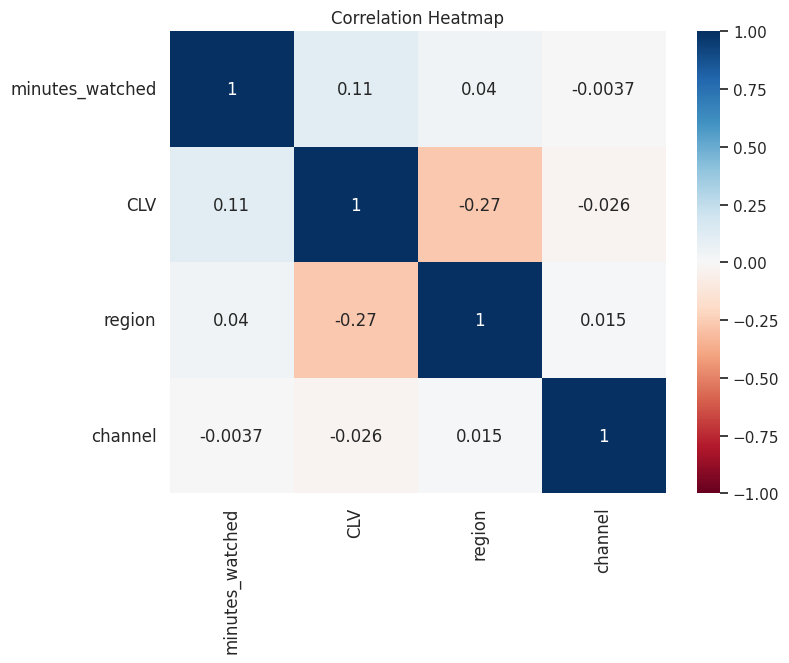

In [10]:
plt.figure(figsize = (8, 6))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.savefig('corr.png')
plt.show()

##Visualize Raw Data

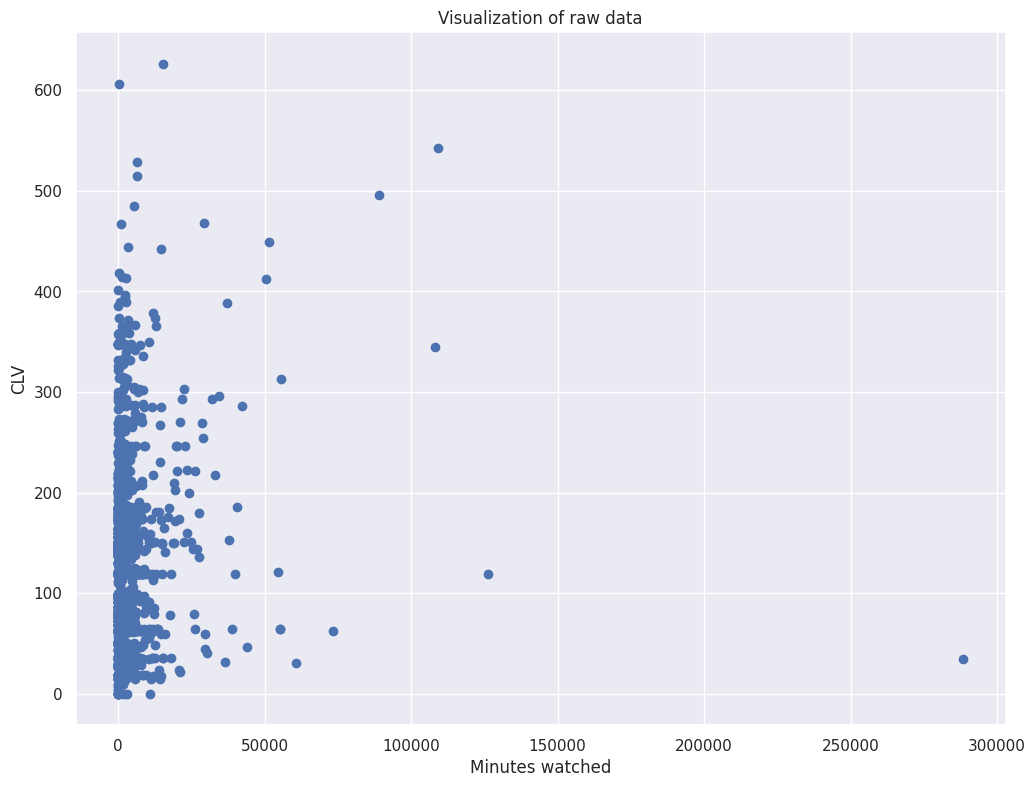

In [11]:
# Setting the size of the plot
plt.figure(figsize = (12, 9))

# Plotting a scatter plot using the first and second columns of the dataframe `df_segmentation`
plt.scatter(df_segmentation.iloc[:, 0], df_segmentation.iloc[:, 1])

# Labeling the x-axis as 'Minutes watched'
plt.xlabel('Minutes watched')

# Labeling the y-axis as 'CLV' (Customer Lifetime Value)
plt.ylabel('CLV')

# Providing a title for the plot
plt.title('Visualization of raw data')

# Saving the plot as a PNG image named 'scatter.png'
plt.savefig("scatter.png")

# Displaying the plot
plt.show()

##Create Dummy Variables

In [12]:
# create a list of the channels of acquisition variable
df_heard_from = df_segmentation['channel']

In [13]:
# create a list of the channels of the country variable
df_countries = df_segmentation['region']

In [14]:
# Get dummy variables for each unique value in 'channel'
df_dummies = pd.get_dummies(df['channel'].apply(pd.Series).stack())

# Use groupby on index and then sum the results
df_dummies = df_dummies.groupby(level=0).sum()

# Join the dummy variables to original dataframe
df = df.join(df_dummies)

In [15]:
# identical dummies for the channel of aquisition
segment_dummies = pd.get_dummies(df_heard_from, prefix = 'channel', prefix_sep = '_')
df_segmentation = pd.concat([df_segmentation, segment_dummies], axis = 1)

#df_pa = df_purchase_predictors

In [16]:
# Creating dummy variables for the `df_countries` dataframe.
# Each column in `df_countries` will be prefixed with 'country_region_' in the new columns.
segment_dummies_2 = pd.get_dummies(df_countries, prefix = 'country_region', prefix_sep = '_')

# Appending the created dummy columns from `segment_dummies_2` to the `df_segmentation` dataframe.
df_segmentation = pd.concat([df_segmentation, segment_dummies_2], axis = 1)

In [17]:
# drop the channel variable as it is non-numerical and we'll not be able to perform the segmentation
df_segmentation = df_segmentation.drop(["channel"], axis = 1)

In [18]:
df_segmentation

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
0,3197.0,205.42,2,0,0,0,1,0,0,0,0,0,0,1
1,63.0,149.99,0,1,0,0,0,0,0,0,0,1,0,0
2,605.0,119.00,2,0,1,0,0,0,0,0,0,0,0,1
3,20.0,240.00,2,0,0,0,1,0,0,0,0,0,0,1
4,245.0,184.36,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,0,0,1,0,0,0,0,0,1,0,0
3830,28.0,79.00,0,0,1,0,0,0,0,0,0,1,0,0
3831,57.0,36.00,2,0,1,0,0,0,0,0,0,0,0,1
3832,44.0,36.00,2,1,0,0,0,0,0,0,0,0,0,1


In [19]:
# rename the columns after adding the dummie variables
df_segmentation = df_segmentation.rename(columns = {'channel_1':'Google', 'channel_2':'Facebook', 'channel_3':'YouTube','channel_4':'LinkedIn',
                                                    'channel_5':'Twitter', 'channel_6':'Instagram', 'channel_7':'Friend', 'channel_8':'Other',
                                                    'country_region_0':'Region_0','country_region_1':'Region_1','country_region_2':'Region_2'})

In [20]:
df_segmentation

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2
0,3197.0,205.42,2,0,0,0,1,0,0,0,0,0,0,1
1,63.0,149.99,0,1,0,0,0,0,0,0,0,1,0,0
2,605.0,119.00,2,0,1,0,0,0,0,0,0,0,0,1
3,20.0,240.00,2,0,0,0,1,0,0,0,0,0,0,1
4,245.0,184.36,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,0,0,1,0,0,0,0,0,1,0,0
3830,28.0,79.00,0,0,1,0,0,0,0,0,0,1,0,0
3831,57.0,36.00,2,0,1,0,0,0,0,0,0,0,0,1
3832,44.0,36.00,2,1,0,0,0,0,0,0,0,0,0,1


#Model Implementation

##Standardization

In [21]:
# Initializing a StandardScaler object to standardize the features.
scaler = StandardScaler()

# Standardizing the data in the 'df_segmentation' dataframe.
# This means transforming the data so that it has a mean of 0 and a standard deviation of 1 for each feature.
segmentation_std = scaler.fit_transform(df_segmentation)

In [22]:
# Performing hierarchical clustering on the standardized data using the 'ward' method.
# The 'ward' method minimizes the sum of squared differences within all clusters.
hier_clust = linkage(segmentation_std, method = 'ward')

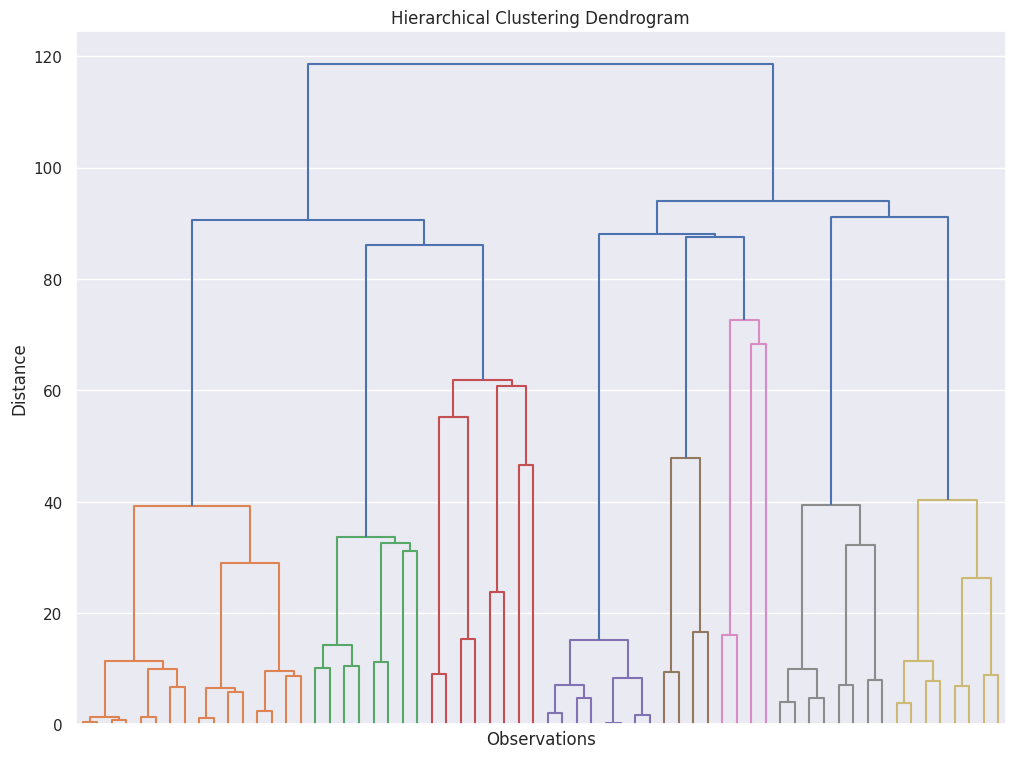

In [23]:
# Setting the figure size for the plot.
plt.figure(figsize = (12,9))

# Setting the title of the dendrogram.
plt.title('Hierarchical Clustering Dendrogram')

# Labeling the x-axis as 'Observations'.
plt.xlabel('Observations')

# Labeling the y-axis as 'Distance'.
plt.ylabel('Distance')

# Creating the dendrogram for the hierarchical clustering result.
# We're truncating the dendrogram to show only the last 5 merged clusters.
# Leaf counts and labels are not displayed.
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)

# Saving the dendrogram plot as a PNG image named 'hierarchical.png'.
plt.savefig('hierarchical.png')

# Displaying the dendrogram.
plt.show()

#K-means Clustering

In [24]:
# Initializing an empty list to store the Within-Cluster-Sum-of-Squares (WCSS) for different cluster numbers.
wcss = []

# Looping through numbers 1 to 10 to evaluate the optimal number of clusters for k-means clustering.
for i in range(1,11):
    # Initializing the KMeans algorithm with the current number of clusters (i).
    # Using the 'k-means++' method to initialize the centroids which tends to speed up convergence.
    # Setting a random state for reproducibility.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

    # Fitting the standardized data to the KMeans algorithm.
    kmeans.fit(segmentation_std)

    # Appending the WCSS value (inertia_) of the current clustering to the wcss list.
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

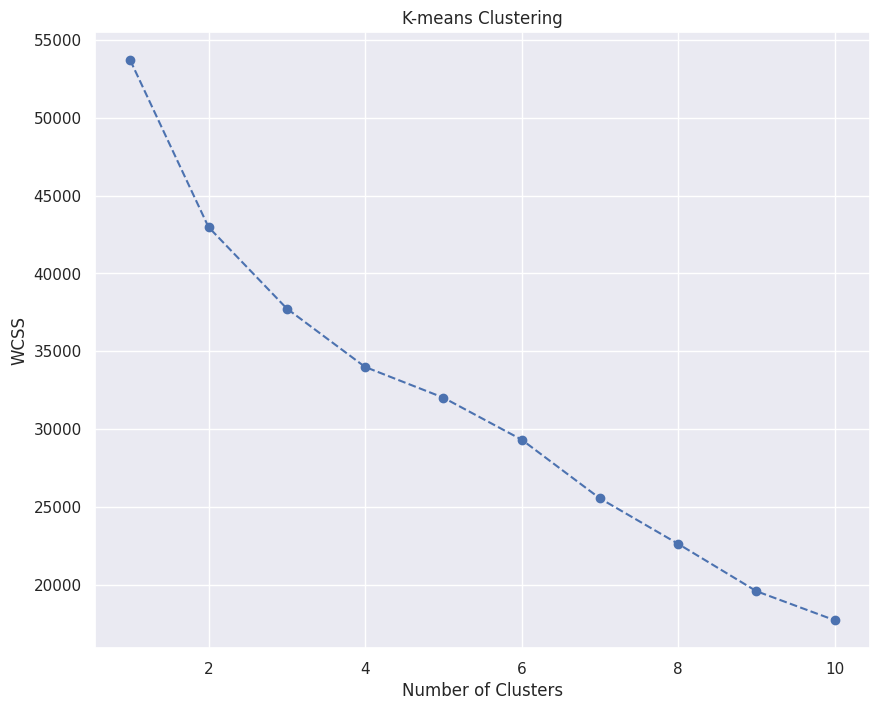

In [25]:
# Setting the figure size for the plot.
plt.figure(figsize = (10,8))

# Plotting the WCSS values against the number of clusters.
# This is commonly called the Elbow Method, as the elbow point (bend in the line) represents an optimal number of clusters.
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')

# Saving the Elbow Method plot as a PNG image named 'line_chart.png'.
plt.savefig('line_chart.png')

# Displaying the plot.
plt.show()

In [26]:
# the KMeans algorithm is initialized here with 8 clusters.
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)

In [27]:
# Fitting the standardized data to the KMeans algorithm with 8 clusters.
kmeans.fit(segmentation_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

#Model Interpretation and Results

In [28]:
# Creating a copy of the original 'df_segmentation' dataframe to avoid modifying it directly.
df_segm_kmeans = df_segmentation.copy()

# Assigning the cluster labels generated by k-means to a new column named 'Segment' in the copied dataframe.
df_segm_kmeans['Segment'] = kmeans.labels_

In [29]:
pd.set_option('display.max_columns', 500)

In [30]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()
df_segm_analysis


# Grouping the dataframe by the 'Segment' column and calculating the mean for each segment.
# This provides a profile for each cluster based on the mean values of the original features.
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()

# Displaying the segmented analysis (this line is more relevant in an interactive environment like Jupyter Notebook).
df_segm_analysis

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2
Segment,,,,,,,,,,,,,,
0,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.311419,0.190311,0.498270
1,1801.265985,91.118312,2.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
2,2018.969340,109.117382,1.419811,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.290094,0.000000,0.709906
3,2326.887114,103.938839,2.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,0.000000,0.000000,1.000000
4,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1.000000,0.000000,0.000000
5,1874.747312,157.922581,1.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,0.000000,1.000000,0.000000
6,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.172414,0.051724,0.775862
7,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.287582,0.101307,0.611111


In [31]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment','Region_0']].groupby(['Segment']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()


# Counting the number of observations in each segment.
# This is done by grouping by 'Segment' and counting the occurrences.
# 'Region_0' is used arbitrarily to count, as it exists in each segment.
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment','Region_0']].groupby(['Segment']).count()

# Calculating the proportion of observations in each segment.
# This is done by dividing the number of observations in a segment by the total number of observations.
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [32]:
# Rounding the dataframe values to 2 decimal places for cleaner presentation.
df_segm_analysis.round(2)

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
0,1299.33,115.18,1.19,0.00,0.0,0.00,0.00,0.0,1.0,0.00,0.00,0.31,0.19,0.50,289,0.08
1,1801.27,91.12,2.00,0.00,0.0,0.00,1.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,391,0.10
2,2018.97,109.12,1.42,0.00,0.0,0.00,0.00,0.0,0.0,1.00,0.00,0.29,0.00,0.71,424,0.11
3,2326.89,103.94,2.00,0.35,0.0,0.54,0.00,0.0,0.0,0.00,0.11,0.00,0.00,1.00,939,0.24
4,1539.15,136.33,0.00,0.25,0.0,0.43,0.18,0.0,0.0,0.00,0.14,1.00,0.00,0.00,1055,0.28
5,1874.75,157.92,1.00,0.22,0.0,0.34,0.19,0.0,0.0,0.15,0.11,0.00,1.00,0.00,372,0.10
6,985.33,93.15,1.60,0.00,0.0,0.00,0.00,1.0,0.0,0.00,0.00,0.17,0.05,0.78,58,0.02
7,2767.64,108.26,1.32,0.00,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.29,0.10,0.61,306,0.08


In [33]:
# Renaming the index labels (which are segment numbers) with more descriptive names.
# This provides a more interpretable profile for each cluster.
df_segm_analysis.rename({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel',
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers',
                        })

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
Instagram Explorers,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.311419,0.190311,0.498270,289,0.075378
LinkedIn Networkers,1801.265985,91.118312,2.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,391,0.101982
Friends' Influence,2018.969340,109.117382,1.419811,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.290094,0.000000,0.709906,424,0.110589
Google-YouTube Mix,2326.887114,103.938839,2.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,0.000000,0.000000,1.000000,939,0.244914
Anglo-Saxon Multi-Channel,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1.000000,0.000000,0.000000,1055,0.275170
European Multi-Channel,1874.747312,157.922581,1.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,0.000000,1.000000,0.000000,372,0.097027
Twitter Devotees,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.172414,0.051724,0.775862,58,0.015128
Facebook Followers,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.287582,0.101307,0.611111,306,0.079812


In [34]:
# Mapping the cluster numbers (Segment) to more human-readable labels using a dictionary.
# This helps in interpreting the clusters in plots and other visualizations.
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment'].map({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel',
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers',
                        })

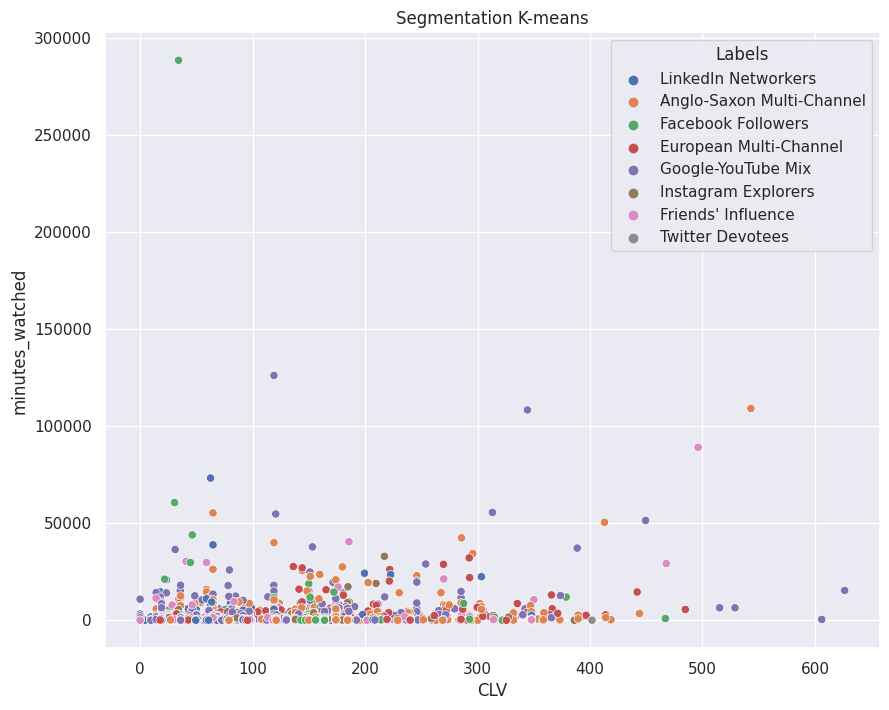

In [35]:
# Defining the x-axis data as 'total_payments' from the dataframe.
x_axis = df_segm_kmeans['CLV']

# Defining the y-axis data as 'minutes_watched' from the dataframe
y_axis = df_segm_kmeans['minutes_watched']

# Setting the figure size for the scatter plot.
plt.figure(figsize = (10, 8))

# Creating a scatter plot using seaborn.
# The 'hue' parameter colors the points based on the 'Labels' column, allowing for distinction between clusters.
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'])

# Setting the title of the scatter plot.
plt.title('Segmentation K-means')

# Displaying the scatter plot.
plt.show()